# Question 1

In [1]:
from scipy.stats import beta # import beta distribution
def beta_measure(a,b): # define beta distribution
    d =  beta.cdf([a,b],3,7)   # calculate the probability of a and b
    d = d[1]-d[0] # Minus value of a from b to attain probability mass
    return d# return the probability mass

In [2]:
a = beta_measure(0,1)
b = beta_measure(0,0)
c = beta_measure(0.25,0.75)
d = beta_measure(0,0.5)
e = beta_measure(0.5,1)

In [3]:
x = [a,b,c,d,e] #A list of the probability mass

for i in x:# A for loop to print out the various probability masses
    print("The probability mass is: ",i)

The probability mass is:  1.0
The probability mass is:  0.0
The probability mass is:  0.599334716796875
The probability mass is:  0.91015625
The probability mass is:  0.08984375


c:\Users\tedjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'The PDF of Beta(3,7)')]

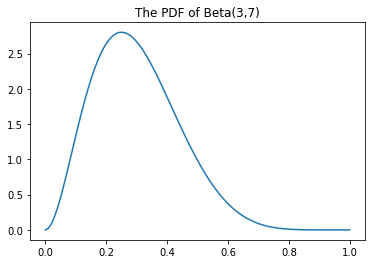

In [4]:
import seaborn as sns
import numpy as np
x = np.linspace(0,1,100)
y = beta.pdf(x,3,7)
sns.lineplot(x,y,x='x',y='f(x)').set(title='The PDF of Beta(3,7)')

According to the results from the graph where the majority of the PDF is between 0 and 0.5, which matches with the tally from the probability mass tally.

# Question 2

In [5]:
from scipy.integrate import quad
def beta_pdf(x): # define beta function for pdf that takes in x
    return beta.pdf(x,3,7)


In [6]:
a = quad(beta_pdf,0,1) # Integrate the pdf of 0 and 1 to get the probability mass
b = quad(beta_pdf,0,0)# Integrate the pdf of 0 and 0 to get the probability mass
c = quad(beta_pdf,0.25,0.75) # Integrate the pdf of 0.25 and 0.75 to get the probability mass
d = quad(beta_pdf,0,0.5)# Integrate the pdf of 0 and 0.5 to get the probability mass
e = quad(beta_pdf,0.5,1)# Integrate the pdf of 0.5 and 1 to get the probability mass

In [7]:
x = [a,b,c,d,e] #A list of the  cdf values
for i in x: 
    print("The Integrated PDF Value is: ", i[0])

The Integrated PDF Value is:  1.0
The Integrated PDF Value is:  0.0
The Integrated PDF Value is:  0.5993347167968751
The Integrated PDF Value is:  0.9101562499999999
The Integrated PDF Value is:  0.08984374999999997


The results from the integration of the PDF results match with the probability tally from the first question. Proving that the CDF is the integral of the PDF and the PDF is the derivative of the CDF.

#  Question 3

Write a function which implements the integrand of the integral above, that is to say that implements
f1(x)f2(t−x), where f1 is the density of Beta (3, 7) and f2 is the density of Beta (7, 3). (Hint: this function
will need two arguments.)


In [8]:
def beta_pdf(x): # define beta function for pdf that takes in x
    return beta.pdf(x,3,7)
def beta_pdf2(x): # define beta function for pdf that takes in t
    return beta.pdf(x,7,3)

In [9]:
def intergrand(x,a,b,t): # define the intergrand function
    return a(x)*b(t-x)

In [10]:
num_list = np.linspace(0,2,100)#Create a number of values between 0 and 2 with a hundred intervals
x = []#Create an empty array to add the values which will be used for plotting
for i in num_list:#Loop through each value which will be integrated and added to the x array
    f1n2 = quad(intergrand,0,2,args=(beta_pdf,beta_pdf2,i))[0]
    x.append(f1n2)#Insert the value into the x array

c:\Users\tedjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

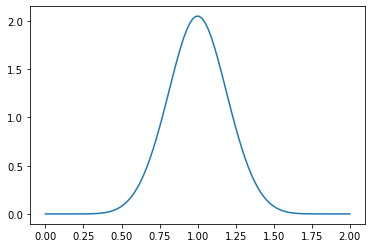

In [11]:
sns.lineplot(num_list,x)

c:\Users\tedjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Density'>

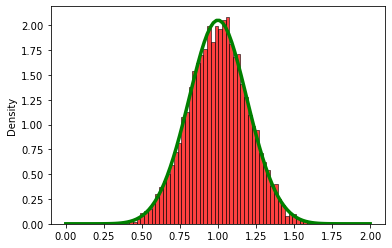

In [ ]:
N =10000
r = beta.rvs(3,7,size=N,random_state=20)
r1 = beta.rvs(7,3,size=N,random_state=21)
r2 = r+r1



import seaborn as sns
sns.histplot(r2,stat='density',color='red')
sns.lineplot(num_list,x,color='green',linewidth=3.5)

# Question 4


In [ ]:
from pandas_datareader import DataReader
import pandas as pd
my_data = DataReader('MSFT','yahoo', '2012-11-02', '2022-11-02')
my_data.head()
close_data = my_data['Close']
daily_returns = ((close_data/close_data.shift(periods=1))-1) *100
daily_returns



Date
2012-11-02         NaN
2012-11-05    0.440675
2012-11-06    0.776245
2012-11-07   -2.612192
2012-11-08   -0.928475
                ...   
2022-10-27   -1.975621
2022-10-28    4.022049
2022-10-31   -1.585615
2022-11-01   -1.705943
2022-11-02   -3.536833
Name: Close, Length: 2518, dtype: float64

<AxesSubplot:xlabel='Close', ylabel='Count'>

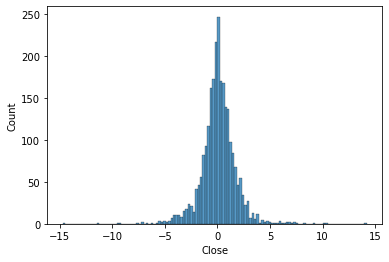

In [ ]:
import seaborn as sns
sns.histplot(daily_returns)

The support of the data from daily returns is has a symmetrical distribution as major of data is in the central section of the plot as well as there are not tails in the graphs. Meaning its a Normal distribution.

c:\Users\tedjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close', ylabel='Density'>

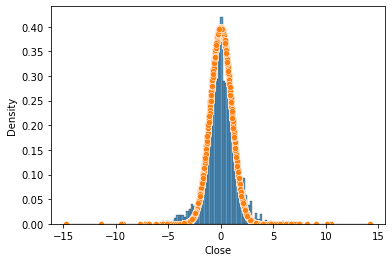

In [ ]:
from scipy.stats import norm 
z = norm.pdf(daily_returns)
sns.histplot(daily_returns,stat='density')
sns.scatterplot(daily_returns,z)

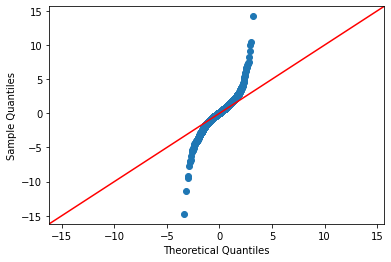

In [ ]:
import statsmodels.api as sm
import pylab
sm.qqplot(daily_returns,line="45")
pylab.show()